# Comcast Telecom Consumer Complaints

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.
Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
 - Which state has the maximum complaints
 - Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from datetime import datetime

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sanjeevkulkarni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [146]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

In [147]:
pd.set_option("display.max_rows", None) 
pd.set_option("display.max_columns", None)

In [148]:
df = pd.read_csv('~/Downloads/Comcast_telecom_complaints_data.csv')
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [149]:
df.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [151]:
# contains duplicate value for same state just spelling mistake

df.loc[df['State']=='District of Columbia','State'] = 'District Of Columbia'

### **<font color=blue>There are no missing values we can proceed further</font>**

### **<font color=blue>Here Date and Date_month_year column are object we need to change that to datetime type</font>**

In [152]:
df['Date'] = pd.to_datetime(df['Date'],format = '%d-%m-%y')
df['Date_month_year'] = pd.to_datetime(df['Date_month_year'],format = '%d-%b-%y')

### **<font color=blue>Date columns type have been changed now.</font>**

### **<font color=blue>Now let's create columns for Month, day from date column</font>**

In [153]:
df['month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day of week'] = df['Date'].dt.day_name()
df[['Date','Day','month','Day of week']].head()

,Date,Day,month,Day of week
0,2015-04-22,22,4,Wednesday
1,2015-08-04,4,8,Tuesday
2,2015-04-18,18,4,Saturday
3,2015-07-05,5,7,Sunday
4,2015-05-26,26,5,Tuesday


In [154]:
# Provide the trend chart for the number of complaints at monthly and daily granularity levels

month_trend = df.groupby(['month'],as_index=False)['Ticket #'].count()
month_trend.columns = ['Month','Number of Complaints']

day_of_week_trend = df.groupby(['Day of week'],as_index=False)['Ticket #'].count()
day_of_week_trend.columns = ['Day','Number of Complaints']

daily = df.groupby('Date').count()['Ticket #'].reset_index()
daily.columns = ['Date','Number of complaints']
daily.sort_values(by='Number of complaints',ascending=False).head()

,Date,Number of complaints
66,2015-06-24,218
65,2015-06-23,190
67,2015-06-25,98
68,2015-06-26,55
72,2015-06-30,53


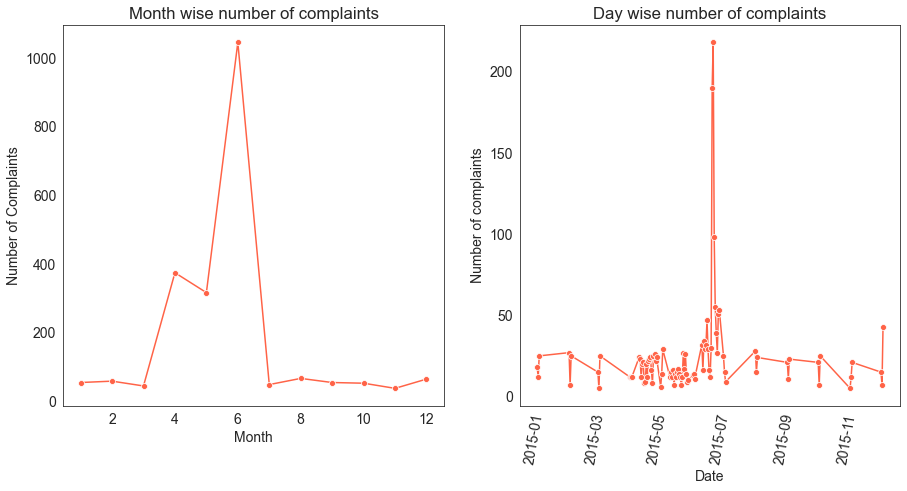

In [215]:
fig , ax = plt.subplots(1,2,figsize=(15,7))

sns.set_style("white");
sns.lineplot(data=month_trend,x='Month',y='Number of Complaints',marker='o',ax=ax[0],color="tomato");
ax[0].set_title('Month wise number of complaints');

sns.set_style("white");
sns.lineplot(x=daily['Date'],y=daily['Number of complaints'],marker='o',ax=ax[1],color="tomato");
ax[1].set_title('Day wise number of complaints');
plt.xticks(rotation=80);

## <font color="blue">As you can see, June month had lots of complaints maybe because of some infrastructure issue.</font>

## <font color="blue">Here we can see that ticket count was normal till 21st june 2015 but it saw a peak on 23rd and 24th june. So we can look into these two days specifically.</font>

### 2) Create complaint type column.
- Internet (if the internet word is there in the complaint description)
- Network speed (if network / speed / down / outage / slow / block word is there in the complaint description)
- Customer Service (if Service word is there in the complaint description)
- Billing (if billing|rates|price word is there in the complaint description)
- Payment (charge is there in the complaint description)
- Data Cap (If cap as a whole word exists in the complaint description)
- Cable Service (If cable as a whole word exists in the complaint description)

In [156]:
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

corpus = []

# Preprocessing the complaint description
for i in range(0,len(df['Customer Complaint'])):
    complaint = df['Customer Complaint'][i].lower() # changing to lowercase
    complaint = re.sub("[^A-Za-z0-9]"," ",complaint) # removing all the special characters
    complaint = complaint.split() # Tokenizing
    
    # Now we remove stopwords and group together similar words i.e services to service and so on.
    lemm = [WordNetLemmatizer().lemmatize(word) for word in complaint if not word in set(stopwords.words('english'))]
    lemm = ' '.join(lemm)
    corpus.append(lemm)

# Converting to series to extract our keywords
corpus = pd.Series(corpus)
domains = pd.DataFrame({'index':range(df.shape[0])})

# Here we are taking mostly used domains in telecom.
domains['Customer Service'] = corpus.str.extract("(service)")
domains['Internet'] = corpus.str.extract("(internet)")
domains['Billing'] = corpus.str.extract("(billing|rates|price)")
domains['Payment'] = corpus.str.extract("(charge)")
domains['Cable Service'] = corpus.str.extract("(cable)")
domains['Data cap'] = corpus.str.extract("(cap)")
domains['Network'] = corpus.str.extract("(speed|network|down|outage|slow|block)")


domains.drop('index',axis=1,inplace=True)
word_count = domains.notnull().sum().sort_values(ascending=False)
print(word_count)

Internet            532
Customer Service    489
Billing             356
Network             279
Data cap            190
Payment             139
Cable Service        58
dtype: int64


In [157]:
complaints = pd.DataFrame(word_count).reset_index()
complaints.columns = ['Complaint type','Number of complaints']
complaints

,Complaint type,Number of complaints
0,Internet,532
1,Customer Service,489
2,Billing,356
3,Network,279
4,Data cap,190
5,Payment,139
6,Cable Service,58


## <font color="blue">As you can clearly see "Internet" and "Customer Service" are majority type of complaints.</font>
<font color="blue">Let's Visualize this.</font>

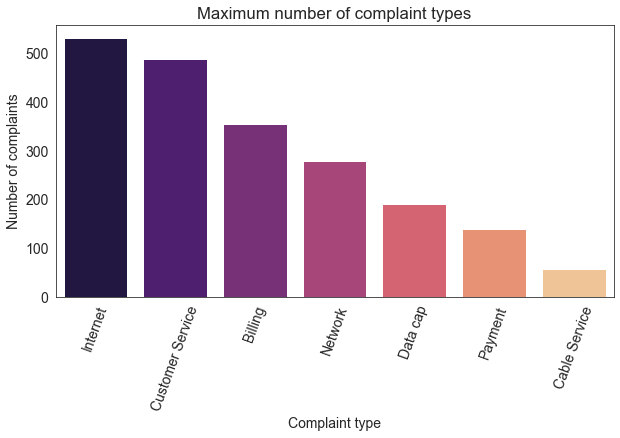

In [158]:
sns.barplot(x=complaints['Complaint type'],y=complaints['Number of complaints'],palette = "magma");
plt.title('Maximum number of complaint types');
plt.xticks(rotation=70);

## 3) Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [159]:
## Let's create a categorical variable for complaint status

df.loc[((df['Status'] == 'Open') | (df['Status'] == 'Pending')),'complaint_status_new'] = 'Open'
df.loc[((df['Status'] == 'Closed') | (df['Status'] == 'Solved')),'complaint_status_new'] = 'Closed'


In [160]:
complaint_status = df['complaint_status_new'].value_counts().reset_index()
complaint_status.columns = ['status','count']
complaint_status

,status,count
0,Closed,1707
1,Open,517


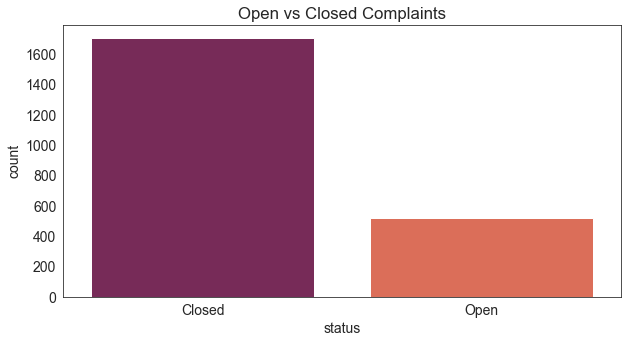

In [161]:
sns.barplot(x=complaint_status['status'],y=complaint_status['count'],palette="rocket");
plt.title("Open vs Closed Complaints");

###  <font color="blue">There are more number of closed tickets than open tickets</font>

## 4) Provide state wise status of complaints in a stacked bar chart

In [208]:
df.groupby(['State'])['Ticket #'].count().sort_values(ascending=False).head(10)

State
Georgia         288
Florida         240
California      220
Illinois        164
Tennessee       143
Pennsylvania    130
Michigan        115
Washington       98
Colorado         80
Maryland         78
Name: Ticket #, dtype: int64

In [214]:
Statewise = pd.crosstab(df.State,df.complaint_status_new)
Statewise['Total']=Statewise.Open+Statewise.Closed
Statewise['Percentage_unresolved']=Statewise.Open/Statewise.Total*100
print(Statewise.Percentage_unresolved.sort_values(ascending=False).head(10))

State
Kansas           50.000000
Kentucky         42.857143
Mississippi      41.025641
Maine            40.000000
Alabama          34.615385
Vermont          33.333333
New Hampshire    33.333333
Delaware         33.333333
Tennessee        32.867133
Texas            30.985915
Name: Percentage_unresolved, dtype: float64


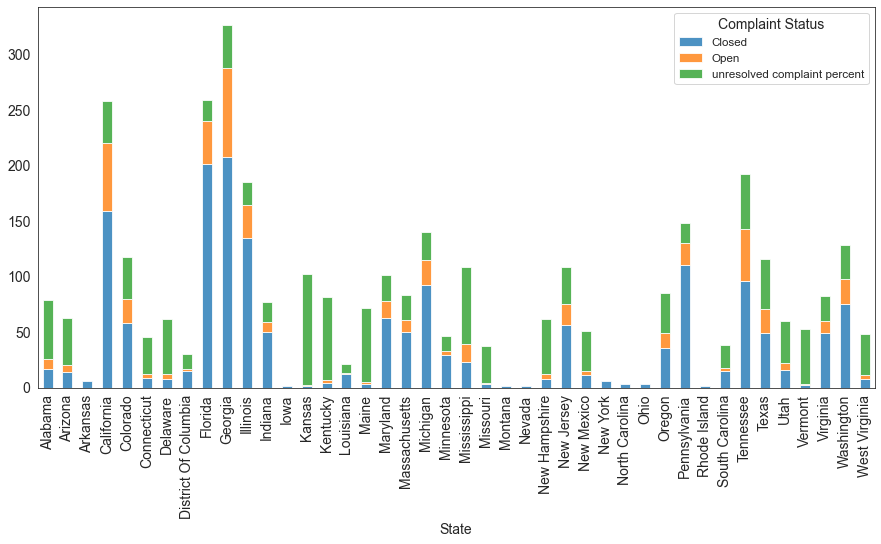

In [163]:
state_wise_status = df.groupby(['State','complaint_status_new'])['Ticket #'].count().unstack().fillna(0)
state_wise_status['unresolved complaint percent']=(state_wise_status['Open']/state_wise_status['Closed']*100)

state_wise_status.plot(kind="bar",stacked=True,figsize=(15,7),alpha=0.8);
plt.legend(title="Complaint Status",loc=1, fontsize='small');

   ### 1) Which state has the maximum complaints
   #### <font color=blue>Ans:- Georgia state has maximum complaints</font>

### 2) Which state has the highest percentage of unresolved complaints
#### <font color=blue>Ans:- Kansas State has highest percentage of unresolved complaints</font>

## 5) Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [164]:
internet_closed_count = df[(df['Received Via'] == 'Internet') & (df['complaint_status_new'] == 'Closed')]['Ticket #'].count()
internet_resolved_percentage = (internet_closed_count/df['Ticket #'].count()) * 100
internet_resolved_percentage

customer_care_closed_count = df[(df['Received Via'] == 'Customer Care Call') & (df['complaint_status_new'] == 'Closed')]['Ticket #'].count()
customer_care_resolved_percentage = (customer_care_closed_count/df['Ticket #'].count()) * 100
customer_care_resolved_percentage

38.84892086330935

In [165]:
dict1 = {'Internet Resolved (%)':internet_resolved_percentage,'Customer Care Resolved (%)':customer_care_resolved_percentage}
df5 = pd.DataFrame(dict1,index=["0"])
df5

,Internet Resolved (%),Customer Care Resolved (%)
0,37.904676,38.848921


## <font color="blue">Tickets received through internet and customer care are resolved in total are 76.74% </font>

In [166]:
total_resolved_percentage = internet_resolved_percentage+customer_care_resolved_percentage
total_unresolved_percentage = 100 - total_resolved_percentage

dict2 = {'Resolved (%)':total_resolved_percentage,'Unresolved (%)':total_unresolved_percentage}
df6 = pd.DataFrame(dict2,index=["0"])
df6

,Resolved (%),Unresolved (%)
0,76.753597,23.246403


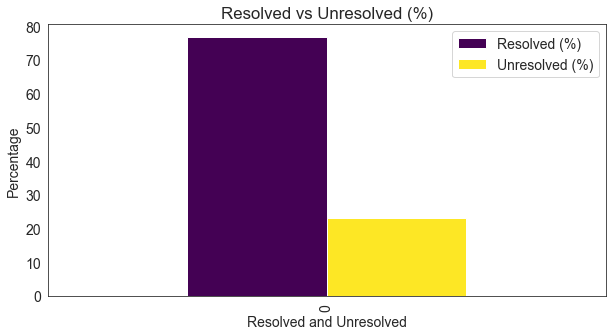

In [167]:
df6.plot(kind="bar",colormap='viridis');
plt.title("Resolved vs Unresolved (%)");
plt.xlabel("Resolved and Unresolved");
plt.ylabel("Percentage");